# Questão 03

- Respostas da 2º Avaliação de SD - 2023 
- Aluno: Matheus Victor Ferreira da Silva
-  Qual a diferença entre Paralelismo e Concorrência? Podemos ter programas paralelos sem ser concorrentes? Demonstre em Python um exemplo de cada.

## Bibliotecas

In [1]:
from threading import Thread
from time import time, sleep
import random
from multiprocessing import Process, Value
from time import time
import pandas as pd
import matplotlib.pyplot as plt

## Paralelismo

o paralelismo ocorre quando duas atividades ocorrem simultaneamente. Assim, em uma máquina que possui um processador multi-core, é possível que em algum momento mais de um processo esteja sendo executado ao mesmo tempo.

No seguinte exemplo, é feito a busca de palavras em um arquivo de texto. Serão realizados testes com Threads e Process.

## Concorrência

A concorrência ocorre quando duas ou mais atividades são realizadas de forma alternada durante o mesmo intervalo de tempo. Com isso, ao iniciar vários processos em uma máquina com um único processador de núcleo único, o processador precisa alternar entre a execução dos processos iniciados, pois apenas um processo pode ser executado de cada vez.


In [2]:
def buscaWithProcess(texto, palavra, result):
    palavras = texto.split(' ')
    count = 0
    for p in palavras:
        if p == palavra:
            count += 1
    
    # A diferença é que o result.value é um objeto compartilhado entre os processos
    with result.get_lock():
        result.value += count

In [3]:
def buscaWithThread(texto, palavra, result):
    palavras = texto.split(' ')
    count = 0
    for p in palavras:
        if p == palavra:
            count += 1
    
    # Com Threads é possível compartilhar objetos, logo basta acessar o campo count do objeto result
    result['count'] += count

### Teste com Processos

In [4]:
res = {'paralelismo': 0, 'concorrencia': 0}

In [5]:
def testProcess():
    with open('texto.txt', 'r') as file:
        texto = file.read().lower()
        plvs = ["mas", "passado", "a", "poderia", "semana", "creio", "casa", "e"]
        resultados = [{'plv': x, 'count': Value('i', 0)} for x in plvs]

        inicio = time()

        processos = [Process(target=buscaWithProcess, args=(texto, r['plv'], r['count'])) for r in resultados]

        for p in processos:
            p.start()
        
        for p in processos:
            p.join()

        fim = time() - inicio

        for r in resultados:
            print(f"A palavra \"{r['plv']}\" aparece {r['count'].value} vezes no texto")
        
        print(f"\nTempo de execução usando paralelismo: {fim} segundos")
    return fim

In [6]:
res['paralelismo'] = testProcess()

A palavra "mas" aparece 468 vezes no texto
A palavra "passado" aparece 5 vezes no texto
A palavra "a" aparece 2182 vezes no texto
A palavra "poderia" aparece 9 vezes no texto
A palavra "semana" aparece 4 vezes no texto
A palavra "creio" aparece 26 vezes no texto
A palavra "casa" aparece 68 vezes no texto
A palavra "e" aparece 1827 vezes no texto

Tempo de execução usando paralelismo: 0.0568845272064209 segundos


### Teste com Threads

In [7]:
def testThread():
    with open('texto.txt', 'r') as file:
        texto = file.read().lower()
        plvs = ["mas", "passado", "a", "poderia", "semana", "creio", "casa", "e"]
        resultados = [{'plv': x, 'count': 0} for x in plvs]

        inicio = time()

        processos = [Thread(target=buscaWithThread, args=(texto, r['plv'], r)) for r in resultados]

        for p in processos:
            p.start()
        
        for p in processos:
            p.join()

        fim = time() - inicio

        for r in resultados:
           print(f"A palavra \"{r['plv']}\" aparece {r['count']} vezes no texto")
        
        print(f"\nTempo de execução usando concorrencia: {fim} segundos")


    return fim

In [8]:
res['concorrencia'] = testThread()

A palavra "mas" aparece 468 vezes no texto
A palavra "passado" aparece 5 vezes no texto
A palavra "a" aparece 2182 vezes no texto
A palavra "poderia" aparece 9 vezes no texto
A palavra "semana" aparece 4 vezes no texto
A palavra "creio" aparece 26 vezes no texto
A palavra "casa" aparece 68 vezes no texto
A palavra "e" aparece 1827 vezes no texto

Tempo de execução usando concorrencia: 0.0879061222076416 segundos


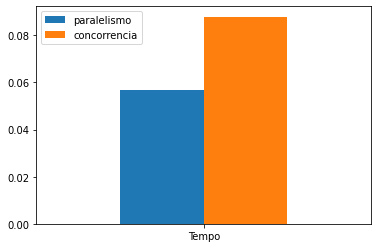

In [9]:
# Fazer um gráfico de duas barras
df = pd.DataFrame(res, index=['Tempo'])
df.plot.bar(rot=0)
plt.show()

Para este exemplo, percebe-se que o tempo de execução foi menor com o uso de paralelismo com multiprocessamento. Isso porque, o multiprocessamento é indicado para tarefas que utilizam mais CPU e possívelmente não precise entrar em modo de espera.